# Linear Regression

In [1]:
import pandas as pd

# Y = 2 + 2 * X

df_sim = pd.DataFrame(
    {
        'Kilometres': [1, 2, 3, 4, 5],
        'Meter': [7.5, 10, 12.5, 15, 17.5],
        'Paid (incl. tips)': [8, 10, 14, 15, 20],
    }
)

In [2]:
df_sim.set_index('Kilometres')[['Meter']]

,Meter
Kilometres,
1,7.5
2,10.0
3,12.5
4,15.0
5,17.5


In [3]:
df_sim.set_index('Kilometres')[['Meter', 'Paid (incl. tips)']]

,Meter,Paid (incl. tips)
Kilometres,,
1,7.5,8
2,10.0,10
3,12.5,14
4,15.0,15
5,17.5,20


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


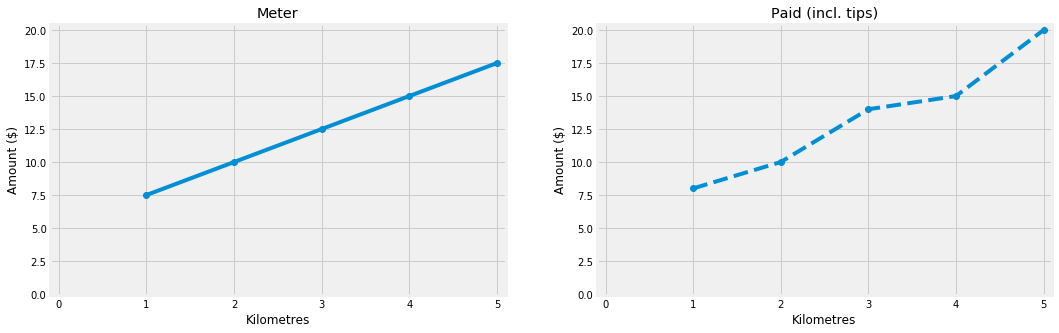

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=False, sharey=False)

df_sim.set_index('Kilometres')['Meter'].plot(title='Meter', kind='line', marker='o', zorder=1, ax=axs[0], grid=True)
df_sim.set_index('Kilometres')['Paid (incl. tips)'].plot(title='Paid (incl. tips)', kind='line', marker='o', linestyle='--', ax=axs[1], grid=True)

axs[0].set_xlabel('Kilometres')
axs[1].set_xlabel('Kilometres')

axs[0].set_ylabel('Amount ($)')
axs[1].set_ylabel('Amount ($)')

axs[0].set_xlim((-0.1,5.1))
axs[0].set_ylim((-0.1,20.5))

axs[1].set_xlim((-0.1,5.1))
axs[1].set_ylim((-0.1,20.5))

# axs[0].plot([0,1], [5,7.5], linestyle='--', color='k', zorder=0, alpha=0.6)

fig.show()

In [5]:
df_taxi = df_sim

In [6]:
df_taxi

,Kilometres,Meter,Paid (incl. tips)
0,1,7.5,8
1,2,10.0,10
2,3,12.5,14
3,4,15.0,15
4,5,17.5,20


In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(df_taxi[['Kilometres']], df_taxi['Paid (incl. tips)'])

df_taxi['Paid (Predicted)'] = reg.predict(df_taxi[['Kilometres']])

In [8]:
print(
    'Amount Paid = {:.1f} + {:.1f} * Distance'.format(
        reg.intercept_, reg.coef_[0], 
    )
) 

Amount Paid = 4.7 + 2.9 * Distance


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


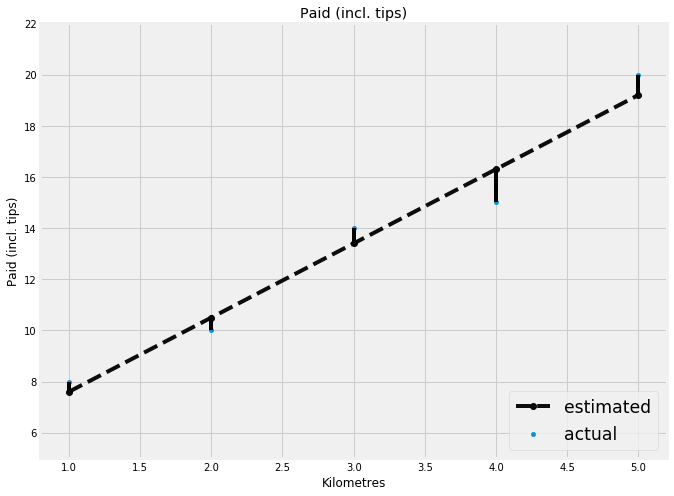

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8), sharex=False, sharey=False)

df_taxi.tail(5).plot(
    label='actual', kind='scatter', x='Kilometres', y='Paid (incl. tips)',
    marker='o', alpha=0.95, ax=ax
)

df_taxi.tail(5).set_index('Kilometres')['Paid (Predicted)'].plot(
    title='Paid (incl. tips)', label='estimated', kind='line', 
    marker='o', linestyle='--', color='k', alpha=0.95, ax=ax
)

x_min, m_max = 0.8, 5.2
y_min, y_max = 5, 22

ax.set_xlim((x_min, m_max))
ax.set_ylim((y_min, y_max))

for x, y1, y2 in df_taxi.tail(5)[
    ['Kilometres', 'Paid (incl. tips)', 'Paid (Predicted)']
].values.tolist():
    ymin, ymax = min(y1, y2), max(y1, y2)
    ymin, ymax = (ymin-y_min)/(y_max-y_min) , (ymax-y_min)/(y_max-y_min)
    ax.axvline(x=x, ymin=ymin, ymax=ymax, color='k')

ax.legend(loc='lower right', fontsize='xx-large')

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


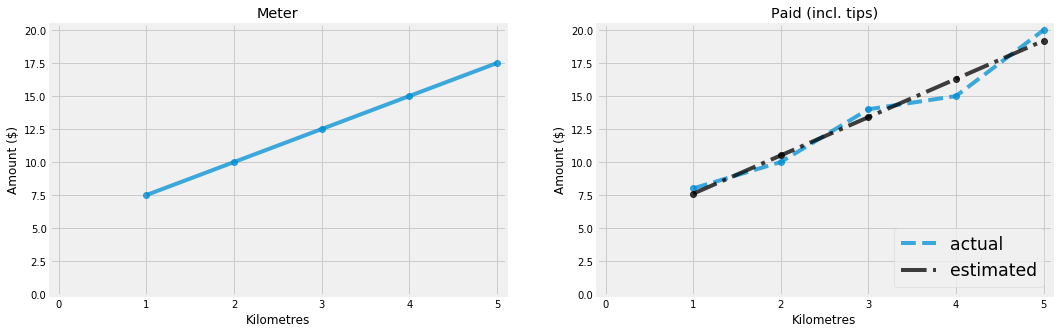

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=False, sharey=False)

df_taxi.set_index('Kilometres')['Meter'].plot(
    title='Meter', kind='line', 
    marker='o', alpha=0.75, ax=axs[0]
)
df_taxi.set_index('Kilometres')['Paid (incl. tips)'].plot(
    label='actual', kind='line', 
    marker='o', linestyle='--', alpha=0.75, ax=axs[1]
)

df_taxi.set_index('Kilometres')['Paid (Predicted)'].plot(
    title='Paid (incl. tips)', label='estimated', kind='line', 
    marker='o', linestyle='-.', color='k', alpha=0.75, ax=axs[1]
)

axs[0].set_xlabel('Kilometres')
axs[1].set_xlabel('Kilometres')

axs[0].set_ylabel('Amount ($)')
axs[1].set_ylabel('Amount ($)')

axs[0].set_xlim((-0.1,5.1))
axs[0].set_ylim((-0.1,20.5))

axs[1].set_xlim((-0.1,5.1))
axs[1].set_ylim((-0.1,20.5))

axs[1].legend(
    markerscale=0.01, loc='lower right', fontsize='xx-large'
)

fig.show()

In [11]:
print(
    'Amount Paid =  {:.1f} + {:.1f} * Distance'.format(
        reg.intercept_, reg.coef_[0], 
    )
) 

Amount Paid =  4.7 + 2.9 * Distance


## Anscombe Data

In [12]:
import pandas as pd

In [13]:
df_anscombe = pd.DataFrame(
    [[10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
     [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
     [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
     [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]]
).T

df_anscombe.columns = ['x', 'y1', 'y2', 'y3']

In [14]:
df_anscombe.set_index('x')

,y1,y2,y3
x,,,
10.0,8.04,9.14,7.46
8.0,6.95,8.14,6.77
13.0,7.58,8.74,12.74
9.0,8.81,8.77,7.11
11.0,8.33,9.26,7.81
14.0,9.96,8.10,8.84
6.0,7.24,6.13,6.08
4.0,4.26,3.10,5.39
12.0,10.84,9.13,8.15


In [15]:
df_anscombe[['y1', 'y2', 'y3']].apply([np.mean, np.std])

,y1,y2,y3
mean,7.500909,7.500909,7.500000
std,2.031568,2.031657,2.030424


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


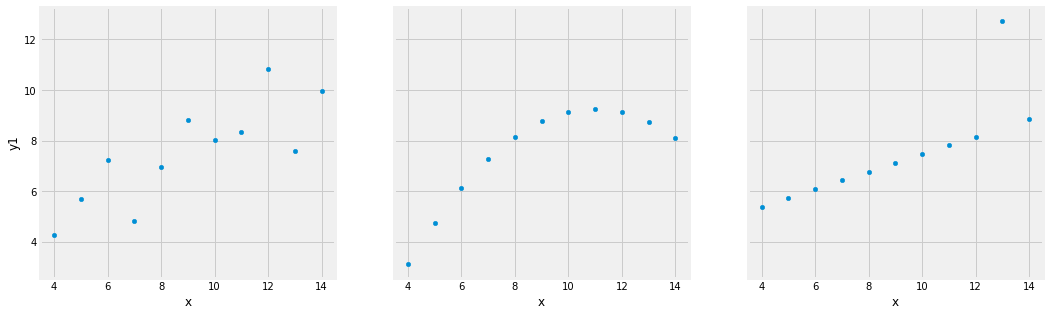

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

for i in range(3):

    df_anscombe.plot(
        kind='scatter', x='x', y=f'y{i+1}', ax=axs[i]
    )
    
fig.show()

R2: 0.67, MSE: 1.25, MAE: 0.84,  MdAE: 0.74   @ target=y1
R2: 0.67, MSE: 1.25, MAE: 0.97,  MdAE: 0.76   @ target=y2
R2: 0.67, MSE: 1.25, MAE: 0.72,  MdAE: 0.39   @ target=y3


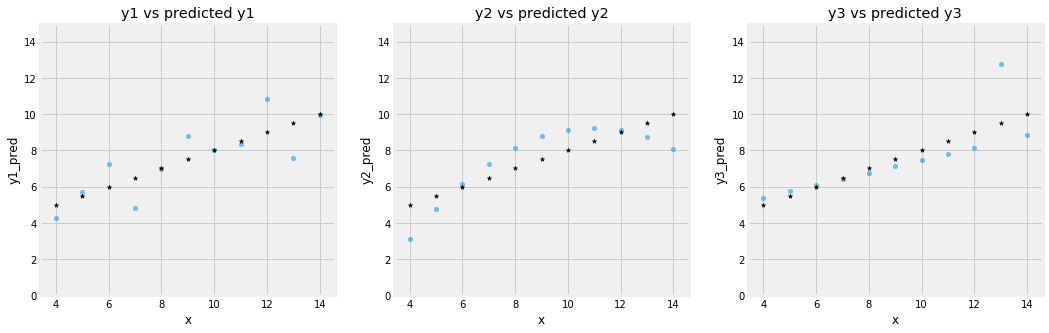

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharey=False)

for i, target in enumerate(['y1', 'y2', 'y3']):

    reg = LinearRegression()
    reg.fit(df_anscombe[['x']], df_anscombe[target])
    df_anscombe[f'{target}_pred'] = reg.predict(df_anscombe[['x']])
    
    df_anscombe.plot(
        title=f'{target} vs predicted {target}', kind='scatter', x='x', y=target, ax=axs[i], marker='o', ylim=(0,15), alpha=0.5
    )
    
    # df_anscombe.set_index('x')[f'{target}_pred'].plot(kind='line', ax=axs[i], color='r')
    df_anscombe.plot(
        kind='scatter', x='x', y=f'{target}_pred', ax=axs[i], marker='*', color='k'
    )

    
    print(
        'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f},  MdAE: {:.2f}   @ target={}'.format(
            r2_score(df_anscombe[target], df_anscombe[f'{target}_pred']),
            mean_squared_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            mean_absolute_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            median_absolute_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            target
        )
    )

MSE: 1.31, MAE: 1.01 @ target=y1
MSE: 0.72, MAE: 0.68 @ target=y2
MSE: 1.34, MAE: 0.98 @ target=y3


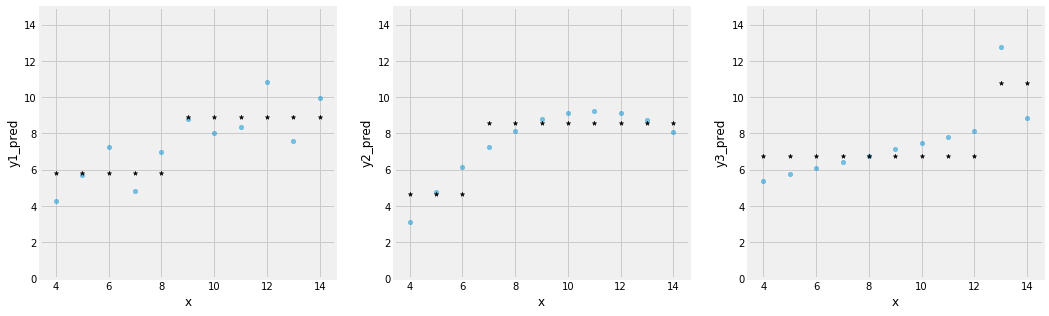

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error, mean_absolute_error

fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharey=False)

for i, target in enumerate(['y1', 'y2', 'y3']):

    reg = DecisionTreeRegressor(max_depth=1)
    reg.fit(df_anscombe[['x']], df_anscombe[target])
    df_anscombe[f'{target}_pred'] = reg.predict(df_anscombe[['x']])
    
    df_anscombe.plot(
        kind='scatter', x='x', y=target, ax=axs[i], marker='o', ylim=(0,15), alpha=0.5
    )
    
    # df_anscombe.set_index('x')[f'{target}_pred'].plot(kind='line', ax=axs[i], color='r')
    df_anscombe.plot(
        kind='scatter', x='x', y=f'{target}_pred', ax=axs[i], marker='*', color='k'
    )
    
    print(
        'MSE: {:.2f}, MAE: {:.2f} @ target={}'.format(
            mean_squared_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            mean_absolute_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            target
        )
    )

In [19]:
 print(export_text(reg, feature_names=['x'], spacing=3, decimals=1))

|--- x <= 12.5
|   |--- value: [6.8]
|--- x >  12.5
|   |--- value: [10.8]



## Diabetes

In [20]:
from sklearn.datasets import load_diabetes

In [21]:
diabetes = load_diabetes()

In [22]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'target',
 'target_filename']

In [23]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [24]:
df_diabetes = pd.DataFrame(
    diabetes.data,
    columns=diabetes.feature_names,
)

df_diabetes['target'] = diabetes.target

In [25]:
df_diabetes.sample(n=5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
413,-0.052738,-0.044642,-0.000817,-0.026328,0.010815,0.007141,0.048640,-0.039493,-0.035817,0.019633,113.0
393,-0.074533,-0.044642,-0.046085,-0.043542,-0.029088,-0.023234,0.015505,-0.039493,-0.039810,-0.021788,69.0
295,-0.052738,0.050680,0.039062,-0.040099,-0.005697,-0.012900,0.011824,-0.039493,0.016305,0.003064,85.0
247,-0.081798,-0.044642,-0.081653,-0.040099,0.002559,-0.018537,0.070730,-0.039493,-0.010904,-0.092204,51.0
35,0.048974,0.050680,-0.030996,-0.049280,0.049341,-0.004132,0.133318,-0.053516,0.021311,0.019633,102.0


In [26]:
df_diabetes.corr()[['target']].T

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
target,0.187889,0.043062,0.58645,0.441484,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,1.0


In [27]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age       442 non-null float64
sex       442 non-null float64
bmi       442 non-null float64
bp        442 non-null float64
s1        442 non-null float64
s2        442 non-null float64
s3        442 non-null float64
s4        442 non-null float64
s5        442 non-null float64
s6        442 non-null float64
target    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


In [28]:
df_diabetes.apply([np.mean, np.std]).T

,mean,std
age,-3.639623e-16,0.047619
sex,1.309912e-16,0.047619
bmi,-8.013951e-16,0.047619
bp,1.289818e-16,0.047619
s1,-9.042540e-17,0.047619
s2,1.301121e-16,0.047619
s3,-4.563971e-16,0.047619
s4,3.863174e-16,0.047619
s5,-3.848103e-16,0.047619
s6,-3.398488e-16,0.047619


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


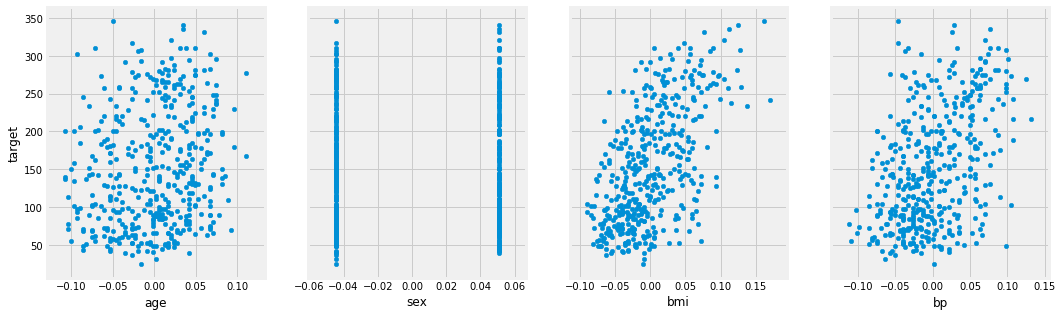

In [29]:
fig, axs = plt.subplots(1, len(diabetes.feature_names[:4]), figsize=(16, 5), sharey=True)

for i, feature in enumerate(diabetes.feature_names[:4]):

    df_diabetes.plot(
        kind='scatter',
        x=feature,
        y='target',
        ax=axs[i]
    )

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


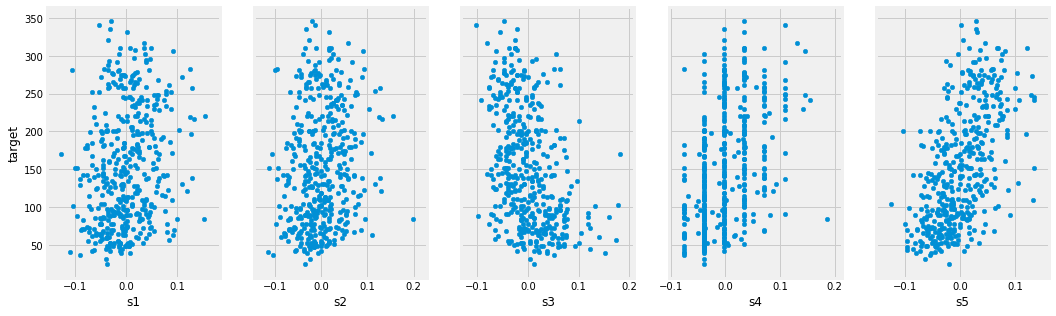

In [30]:
fig, axs = plt.subplots(1, len(diabetes.feature_names[4:9]), figsize=(16, 5), sharey=True)

for i, feature in enumerate(diabetes.feature_names[4:9]):

    df_diabetes.plot(
        kind='scatter',
        x=feature,
        y='target',
        ax=axs[i]
    )

fig.show()

In [31]:
from sklearn.datasets import load_boston

boston = load_boston()

df_dataset = pd.DataFrame(
    boston.data,
    columns=boston.feature_names,
)

df_dataset['target'] = boston.target

In [32]:
from sklearn.datasets import load_boston, fetch_california_housing, load_diabetes

dataset_selection = ['boston', 'california', 'diabetes'][0]

if dataset_selection == 'diabetes':
    _dataset = load_diabetes()
elif dataset_selection == 'boston':
    _dataset = load_boston()
else:
    _dataset = fetch_california_housing()


df_dataset = pd.DataFrame(
    _dataset.data,
    columns=_dataset.feature_names,
)

df_dataset['target'] = _dataset.target

In [33]:
print(_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [34]:
df_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
df_dataset[boston.feature_names].mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

## Data Exploration

In [36]:
df_dataset.isnull().sum().sum()

0

In [37]:
df_dataset['target'].describe(percentiles=[.9, .95, .99])

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
50%       21.200000
90%       34.800000
95%       43.400000
99%       50.000000
max       50.000000
Name: target, dtype: float64

In [38]:
df_dataset[boston.feature_names].describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


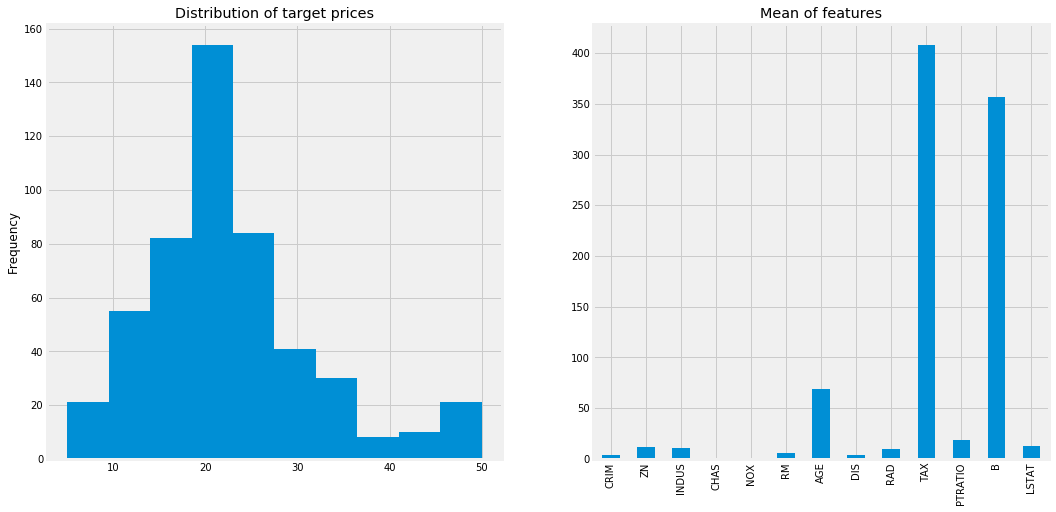

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

df_dataset['target'].plot(title='Distribution of target prices', kind='hist', ax=axs[0])

df_dataset[boston.feature_names].mean().plot(title='Mean of features', kind='bar', ax=axs[1])


fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


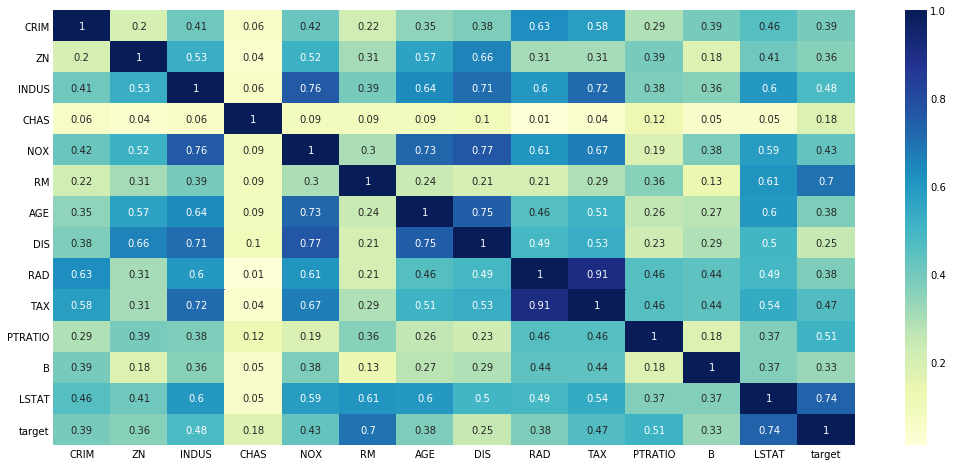

In [40]:
import seaborn as sns 

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.heatmap(data=df_dataset.corr().abs().round(2), annot=True, cmap="YlGnBu", center=0.5, ax=ax)



fig.show()

In [41]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_dataset, test_size=0.4)

x_train = df_train[_dataset.feature_names]
x_test  = df_test[_dataset.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

In [42]:
df_dataset['target'].mean(), df_train['target'].mean(), df_test['target'].mean()

(22.532806324110677, 21.856435643564357, 23.542364532019707)

In [43]:
df_dataset['target'].median(), df_train['target'].median(), df_test['target'].median()

(21.2, 20.5, 22.0)

In [44]:
from sklearn.dummy import DummyRegressor

baselin = DummyRegressor(strategy='mean')
baselin.fit(x_train, y_train)

y_test_baselin = baselin.predict(x_test)

In [45]:
y_test_baselin[:5]

array([21.85643564, 21.85643564, 21.85643564, 21.85643564, 21.85643564])

In [46]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

y_test_pred = reg.predict(x_test)

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_test_pred), 
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_test_pred), 
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_test_pred), 
        mean_squared_error(y_test, y_test_baselin)
    )
)


R2 Regressor = 0.71 vs Baseline = -0.03
MAE Regressor = 3.52 vs Baseline = 7.10
MSE Regressor = 28.55 vs Baseline = 100.80


In [48]:
df_feature_importance = pd.DataFrame(
    {
        'Features': x_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_),
    }
).set_index('Features').sort_values('Coeff', ascending=False)

df_feature_importance

,Coeff,ABS(Coeff)
Features,,
RM,3.558391,3.558391
CHAS,1.690172,1.690172
RAD,0.267724,0.267724
ZN,0.050401,0.050401
B,0.006491,0.006491
TAX,-0.012402,0.012402
AGE,-0.018149,0.018149
INDUS,-0.061649,0.061649
CRIM,-0.132162,0.132162


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


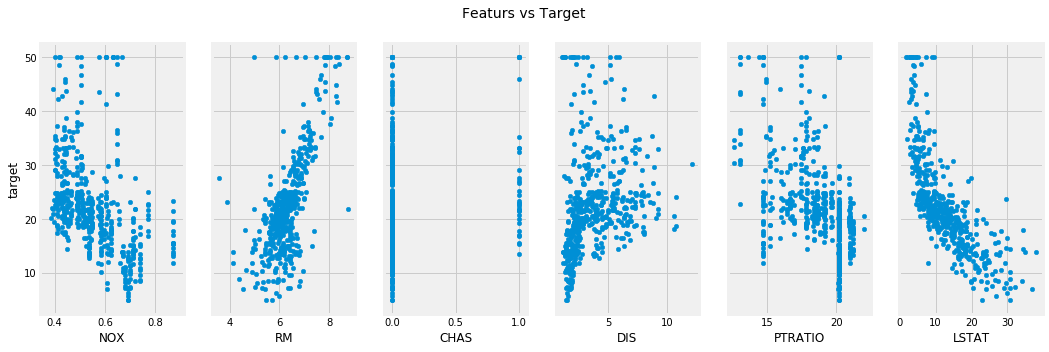

In [49]:
important_featurs = df_feature_importance.sort_values('ABS(Coeff)', ascending=False).index.tolist()[:6]

fig, axs = plt.subplots(1, len(important_featurs), figsize=(16, 5), sharey=True)

fig.suptitle("Featurs vs Target", fontsize=14)

for i, feature in enumerate(important_featurs):

    df_dataset.plot(
        kind='scatter',
        x=feature,
        y='target',
        ax=axs[i]
    )

fig.show()

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = LinearRegression()

scaler.fit(x_train) 
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

reg.fit(x_train_scaled, y_train)

y_test_pred = reg.predict(x_test_scaled)

In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_test_pred), 
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_test_pred), 
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_test_pred), 
        mean_squared_error(y_test, y_test_baselin)
    )
)


R2 Regressor = 0.71 vs Baseline = -0.03
MAE Regressor = 3.52 vs Baseline = 7.10
MSE Regressor = 28.55 vs Baseline = 100.80


In [52]:
df_feature_importance = pd.DataFrame(
    {
        'Features': x_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_),
    }
).set_index('Features').sort_values('Coeff', ascending=False)

df_feature_importance

,Coeff,ABS(Coeff)
Features,,
RM,18.375529,18.375529
RAD,6.157656,6.157656
ZN,5.040125,5.040125
B,2.574150,2.574150
CHAS,1.690172,1.690172
INDUS,-1.681794,1.681794
AGE,-1.691532,1.691532
NOX,-6.333017,6.333017
TAX,-6.498653,6.498653


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


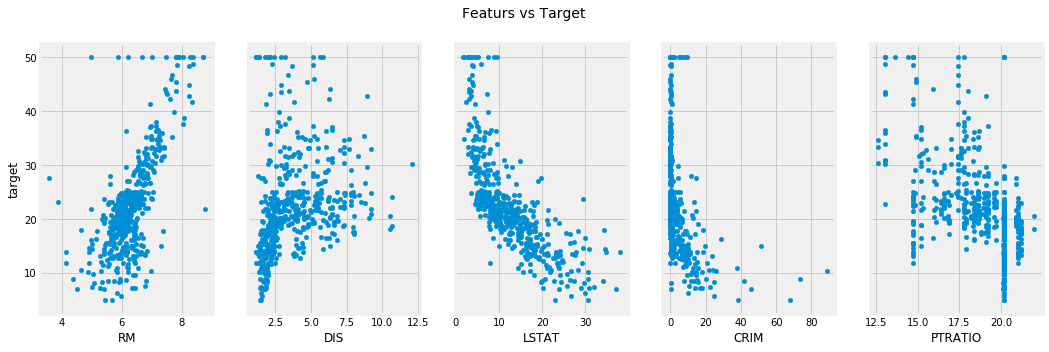

In [53]:
important_featurs = df_feature_importance.sort_values('ABS(Coeff)', ascending=False).index.tolist()[:5]

fig, axs = plt.subplots(1, len(important_featurs), figsize=(16, 5), sharey=True)

fig.suptitle("Featurs vs Target", fontsize=14)

for i, feature in enumerate(important_featurs):

    df_dataset.plot(
        kind='scatter',
        x=feature,
        y='target',
        ax=axs[i]
    )

fig.show()

In [54]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [55]:
feature_translator = [(f'x{i}', feature) for i, feature in enumerate(x_train.columns, 0)]

def translate_feature_names(s):
    for key, val in feature_translator:
        s = s.replace(key, val)
    return s

poly_features = [
    translate_feature_names(f) for f in poly.get_feature_names()
]

In [56]:
poly_features[:5]

['1', 'CRIM', 'ZN', 'INDUS', 'CHAS']

In [57]:
x_train_poly = pd.DataFrame(x_train_poly, columns=poly_features)
x_test_poly = pd.DataFrame(x_test_poly, columns=poly_features)

In [58]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False)
reg.fit(x_train_poly, y_train)

y_test_pred = reg.predict(x_test_poly)

In [59]:
x_train_poly.shape

(303, 560)

In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        r2_score(y_test, y_test_pred), 
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_absolute_error(y_test, y_test_pred), 
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_squared_error(y_test, y_test_pred), 
        mean_squared_error(y_test, y_test_baselin)
    )
)


R2 Regressor = -88.338 vs Baseline = -0.0
MAE Regressor = 45.807 vs Baseline = 7.1
MSE Regressor = 8750.938 vs Baseline = 100.8


In [61]:
x_train_poly.corr()

,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,ZN0^3,ZN0^2 ZN1,ZN0^2 ZN2,ZN0 ZN1^2,ZN0 ZN1 ZN2,ZN0 ZN2^2,ZN1^3,ZN1^2 ZN2,ZN1 ZN2^2,ZN2^3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRIM,NaN,1.000000,-0.195949,0.374318,-0.064587,0.398178,-0.186710,0.351043,-0.367682,0.614124,...,0.306806,-0.112275,0.488589,-0.237138,0.234581,0.471968,-0.324215,0.150635,0.293724,0.426795
ZN,NaN,-0.195949,1.000000,-0.527483,-0.009947,-0.500039,0.301948,-0.541485,0.663943,-0.308166,...,-0.375303,-0.129872,-0.419274,0.024921,-0.336100,-0.320103,0.186270,-0.274832,-0.279963,-0.241475
INDUS,NaN,0.374318,-0.527483,1.000000,0.038172,0.718921,-0.396815,0.638375,-0.673112,0.559148,...,0.404423,-0.001314,0.618610,-0.212490,0.436256,0.531758,-0.398563,0.331595,0.434494,0.429682
CHAS,NaN,-0.064587,-0.009947,0.038172,1.000000,0.042729,0.097155,0.049136,-0.038368,-0.032785,...,-0.086220,-0.000595,-0.089108,0.030093,-0.040755,-0.075348,0.047719,-0.024018,-0.044018,-0.065904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZN0 ZN2^2,NaN,0.471968,-0.320103,0.531758,-0.075348,0.488669,-0.515845,0.514594,-0.450010,0.474502,...,0.394551,-0.040711,0.934915,-0.222303,0.679422,1.000000,-0.363401,0.571154,0.821628,0.968553
ZN1^3,NaN,-0.324215,0.186270,-0.398563,0.047719,-0.425658,0.189685,-0.317759,0.321415,-0.413447,...,-0.132125,0.711811,-0.374140,0.924256,0.249949,-0.363401,1.000000,0.405630,0.071516,-0.311819
ZN1^2 ZN2,NaN,0.150635,-0.274832,0.331595,-0.024018,0.268515,-0.444568,0.367881,-0.265904,0.128158,...,0.264837,0.557996,0.583736,0.519344,0.965786,0.571154,0.405630,1.000000,0.897566,0.522383
ZN1 ZN2^2,NaN,0.293724,-0.279963,0.434494,-0.044018,0.397150,-0.501892,0.442304,-0.360540,0.267471,...,0.267087,0.292633,0.755043,0.193562,0.921780,0.821628,0.071516,0.897566,1.000000,0.804946


In [62]:
df_features = pd.DataFrame(
    {
        'Features': x_train_poly.columns,
        'Coeff': reg.coef_
    }
).set_index('Features').sort_values('Coeff')

df_features[df_features['Coeff'].abs() > 0]


,Coeff
Features,
CRIM NOX ZN2,-0.843088
NOX DIS ZN1,-0.688193
RM^3,-0.680806
TAX ZN0,-0.621916
CRIM NOX AGE,-0.585397
...,...
RM ZN1,0.565188
ZN RM DIS,0.728257
DIS^2 ZN2,0.789516


In [63]:
from sklearn.linear_model import Ridge, Lasso

# reg = Ridge(fit_intercept=False, solver='svd', alpha=1)
reg = Lasso(fit_intercept=False)
reg.fit(x_train_poly, y_train)

y_test_pred = reg.predict(x_test_poly)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 618.532214083453, tolerance: 16.723043
  positive)


In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        r2_score(y_test, y_test_pred), 
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_absolute_error(y_test, y_test_pred), 
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_squared_error(y_test, y_test_pred), 
        mean_squared_error(y_test, y_test_baselin)
    )
)


R2 Regressor = 0.687 vs Baseline = -0.0
MAE Regressor = 3.200 vs Baseline = 7.1
MSE Regressor = 30.699 vs Baseline = 100.8


In [65]:
df_features = pd.DataFrame(
    {
        'Features': x_train_poly.columns,
        'Coeff': reg.coef_
    }
).set_index('Features').sort_values('Coeff')

df_features[df_features['Coeff'].abs() > 0]


,Coeff
Features,
RM^2 ZN2,-0.010202
DIS RAD^2,-0.009402
RM DIS ZN2,-0.008631
RM^2 RAD,-0.008453
NOX TAX,-0.008281
...,...
RM AGE,0.012186
ZN1,0.012232
TAX,0.019408


In [66]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-6, 6, 50)

reg = LassoCV(alphas=alphas, fit_intercept=False, cv=5, n_jobs=5)

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("always", ConvergenceWarning) 

with warnings.catch_warnings(record=True) as w:
    reg.fit(x_train_poly, y_train)

y_train_pred = reg.predict(x_train_poly)
y_test_pred = reg.predict(x_test_poly)

In [67]:
f'{alphas.min():.6f}, {alphas.max():,.0f}'

'0.000001, 1,000,000'

In [68]:
print(f"LassoCV: Chosen alpha = {reg.alpha_}")

LassoCV: Chosen alpha = 372.7593720314938


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


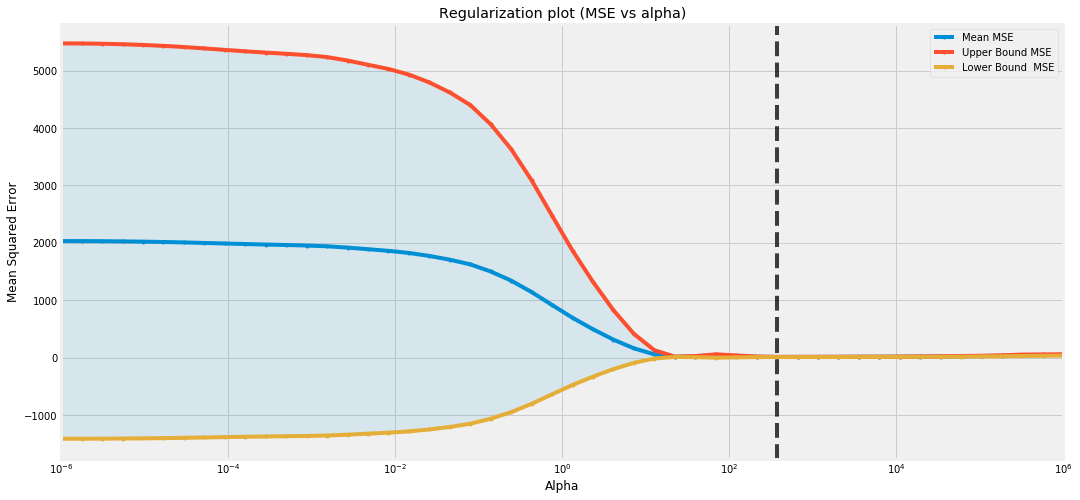

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

n_folds = reg.mse_path_.shape[1]

mse_mean = reg.mse_path_.mean(axis=1)
mse_std = reg.mse_path_.std(axis=1)
mse_std_error = mse_std / np.sqrt(n_folds)

pd.DataFrame(
    {
        'alpha': reg.alphas_,
        'Mean MSE': mse_mean,
        'Upper Bound MSE': mse_mean + 1.96 * mse_std_error,
        'Lower Bound  MSE': mse_mean - 1.96 * mse_std_error,
    }
).set_index('alpha')[['Mean MSE', 'Upper Bound MSE', 'Lower Bound  MSE']].plot(
    title='Regularization plot (MSE vs alpha)', marker='.', logx=True, ax=ax
)

plt.fill_between(reg.alphas_, mse_mean + 1.96 * mse_std_error, mse_mean - 1.96 * mse_std_error, alpha=0.1)

ax.axvline(reg.alpha_,  linestyle='--', color='k', alpha=0.75,)

ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')

fig.show()

In [70]:
# n_folds equals to 5 here
n_folds = reg.mse_path_.shape[1]

# Calculate the mean and standard error for MSEs
mse_mean = reg.mse_path_.mean(axis=1)
mse_std = reg.mse_path_.std(axis=1)
# Std Error = Std Deviation / SQRT(number of samples)
mse_std_error = mse_std / np.sqrt(n_folds)

Text(0, 0.5, 'Mean Squared Error')

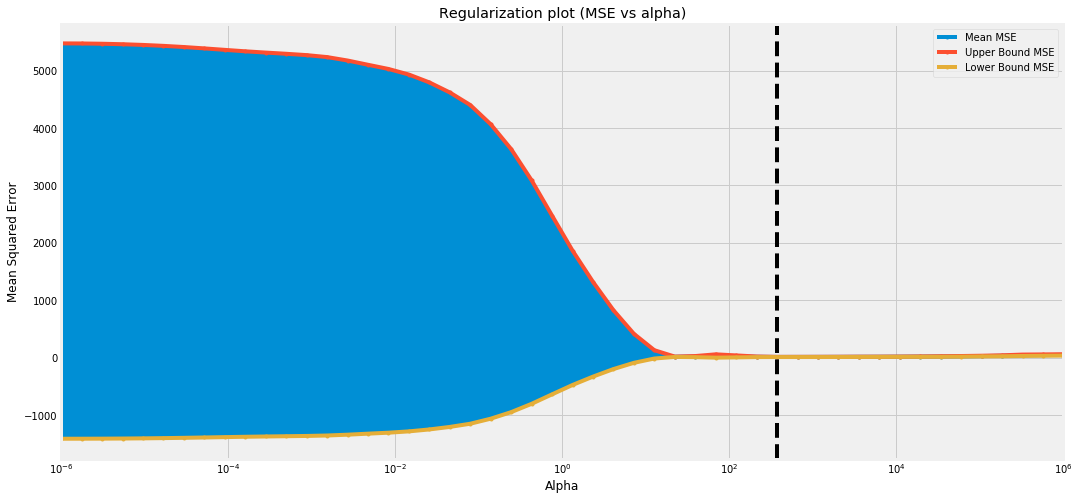

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# We multiply by 1.96 for a 95% Confidence Interval
pd.DataFrame(
    {
        'alpha': reg.alphas_,
        'Mean MSE': mse_mean,
        'Upper Bound MSE': mse_mean + 1.96 * mse_std_error,
        'Lower Bound MSE': mse_mean - 1.96 * mse_std_error,
    }
).set_index('alpha')[
    ['Mean MSE', 'Upper Bound MSE', 'Lower Bound MSE']
].plot(
    title='Regularization plot (MSE vs alpha)', 
    marker='.', logx=True, ax=ax
)

# Color the confidence interval 
plt.fill_between(
    reg.alphas_, 
    mse_mean + 1.96 * mse_std_error, 
    mse_mean - 1.96 * mse_std_error, 
)

# Print a vertical line for the chosen alpha
ax.axvline(reg.alpha_, linestyle='--', color='k')
ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')

In [72]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        r2_score(y_test, y_test_pred), 
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_absolute_error(y_test, y_test_pred), 
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_squared_error(y_test, y_test_pred), 
        mean_squared_error(y_test, y_test_baselin)
    )
)


R2 Regressor = 0.795 vs Baseline = -0.0
MAE Regressor = 2.850 vs Baseline = 7.1
MSE Regressor = 20.079 vs Baseline = 100.8


In [73]:
df_features = pd.DataFrame(
    {
        'Features': x_train_poly.columns,
        'Coeff': reg.coef_
    }
).set_index('Features').sort_values('Coeff')

df_features[df_features['Coeff'].abs() > 0]


,Coeff
Features,
INDUS AGE RAD,-0.000341
INDUS RM TAX,-0.000139
INDUS TAX ZN2,-0.000101
RM RAD TAX,-0.000094
INDUS RAD TAX,-0.000066
...,...
DIS TAX ZN2,0.000073
AGE ZN1,0.000228
RM^2 TAX,0.000460


In [74]:
df_noisy = pd.DataFrame(
    {
        'x': np.random.random_integers(0, 30, size=150),
        'noise': np.random.normal(loc=0.0, scale=5.0, size=150)
    }
)

df_noisy['y'] = df_noisy['x'] + df_noisy['noise']


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 30 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


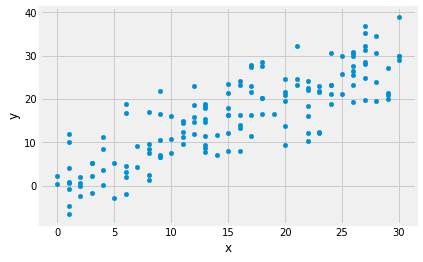

In [75]:
df_noisy.plot(
    kind='scatter', x='x', y='y'
)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
    
lr = LinearRegression()
br = BayesianRidge()

lr.fit(df_noisy[['x']], df_noisy['y'])
df_noisy['y_lr_pred'] = lr.predict(df_noisy[['x']])


br.fit(df_noisy[['x']], df_noisy['y'])
df_noisy['y_br_pred'], df_noisy['y_br_std'] = br.predict(df_noisy[['x']], return_std=True)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


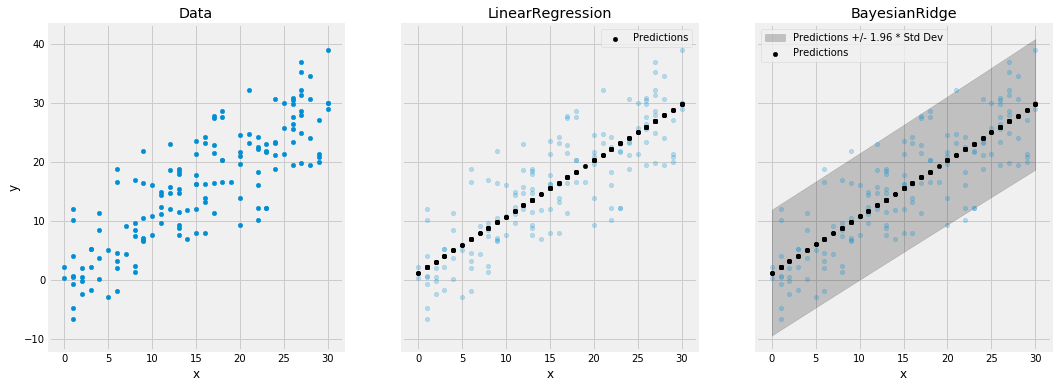

In [77]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True)


df_noisy.sort_values('x').plot(
    title='Data', kind='scatter', x='x', y='y', ax=axs[0]
)
    
df_noisy.sort_values('x').plot(
    kind='scatter', x='x', y='y', ax=axs[1], marker='o', alpha=0.25
)

axs[2].fill_between(
    df_noisy.sort_values('x')['x'], 
    df_noisy.sort_values('x')['y_br_pred'] - 1.96 * df_noisy.sort_values('x')['y_br_std'], 
    df_noisy.sort_values('x')['y_br_pred'] + 1.96 * df_noisy.sort_values('x')['y_br_std'],
    color="k", alpha=0.2, label="Predictions +/- 1.96 * Std Dev"
)

df_noisy.sort_values('x').plot(
    kind='scatter', x='x', y='y', ax=axs[2], marker='o', alpha=0.25
)

df_noisy.sort_values('x').plot(
    title='LinearRegression', kind='scatter', x='x', y='y_lr_pred', 
    ax=axs[1], marker='o', color='k', label='Predictions'
)

df_noisy.sort_values('x').plot(
    title='BayesianRidge', kind='scatter', x='x', y='y_br_pred', 
    ax=axs[2], marker='o', color='k', label='Predictions'
)


axs[1].legend()
axs[2].legend()

    
fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


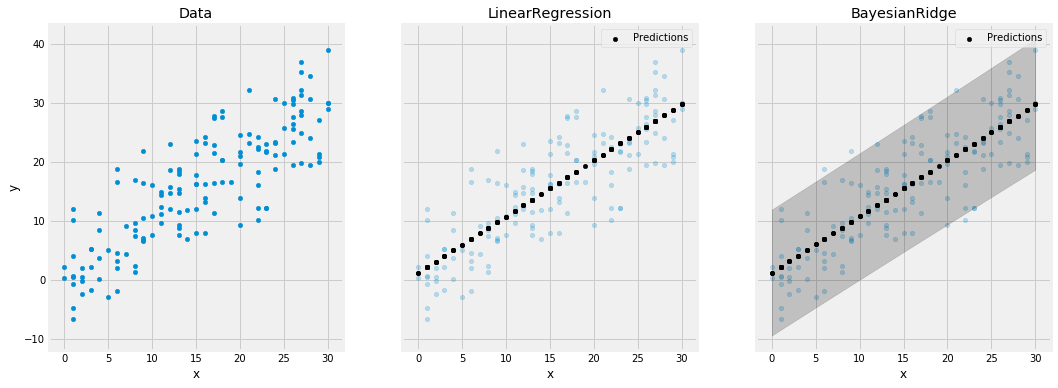

In [80]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True)

# We plot the data 3 times
df_noisy.sort_values('x').plot(
    title='Data', kind='scatter', x='x', y='y', ax=axs[0]
)
df_noisy.sort_values('x').plot(
    kind='scatter', x='x', y='y', ax=axs[1], marker='o', alpha=0.25
)
df_noisy.sort_values('x').plot(
    kind='scatter', x='x', y='y', ax=axs[2], marker='o', alpha=0.25
)

# Here we plot the Linear Regression predictions
df_noisy.sort_values('x').plot(
    title='LinearRegression', kind='scatter', x='x', y='y_lr_pred', 
    ax=axs[1], marker='o', color='k', label='Predictions'
)

# Here we plot the Bayesian Ridge predictions
df_noisy.sort_values('x').plot(
    title='BayesianRidge', kind='scatter', x='x', y='y_br_pred', 
    ax=axs[2], marker='o', color='k', label='Predictions'
)

# Here we plot the range around the expected values
# We multiply by 1.96 for a 95% Confidence Interval
axs[2].fill_between(
    df_noisy.sort_values('x')['x'], 
    df_noisy.sort_values('x')['y_br_pred'] - 1.96 * df_noisy.sort_values('x')['y_br_std'], 
    df_noisy.sort_values('x')['y_br_pred'] + 1.96 * df_noisy.sort_values('x')['y_br_std'],
    color="k", alpha=0.2, label="Predictions +/- 1.96 * Std Dev"
)

fig.show()

KeyError: 'y1_br_pred'

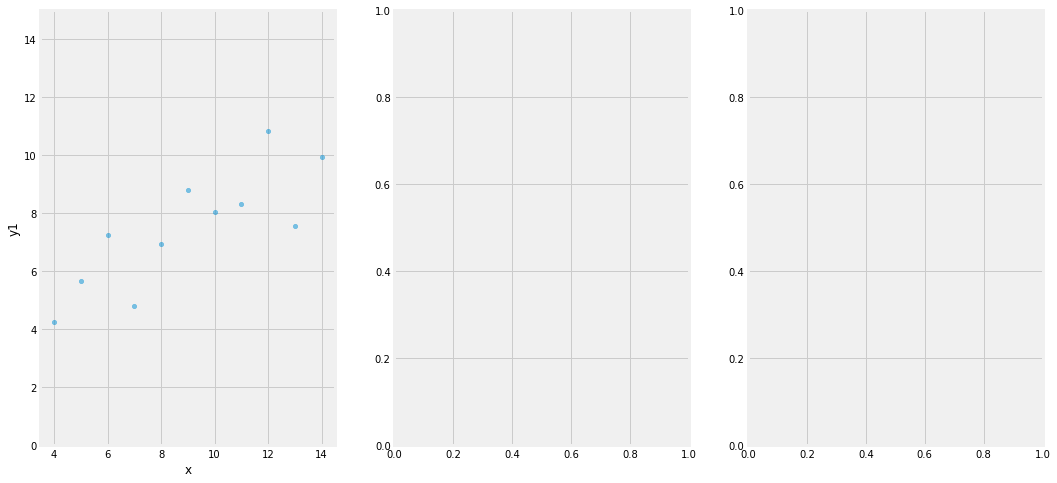

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(16, 8))

for i, target in enumerate(['y1', 'y2', 'y3']):
    
    df_anscombe.plot(
        kind='scatter', x='x', y=target, ax=axs[i], marker='o', ylim=(0,15), alpha=0.5
    )
    
    df_anscombe.plot(
        kind='scatter', x='x', y=f'{target}_br_pred', ax=axs[i], marker='*', color='k'
    )
    
    axs[i].fill_between(
        df_anscombe['x'], 
        df_anscombe[f'{target}_br_pred'] - 1.96 * df_anscombe[f'{target}_br_std'], 
        df_anscombe[f'{target}_br_pred'] + 1.96 * df_anscombe[f'{target}_br_std'],
        color="pink", alpha=0.5, label="predict std"
    )
    
    print(
        'MSE: {:.2f}, MAE: {:.2f} @ target={}'.format(
            mean_squared_error(df_anscombe[target], df_anscombe[f'{target}_br_pred']),
            mean_absolute_error(df_anscombe[target], df_anscombe[f'{target}_br_pred']),
            target
        )
    )
    
fig.show()

NameError: name 'x_test_lstat' is not defined

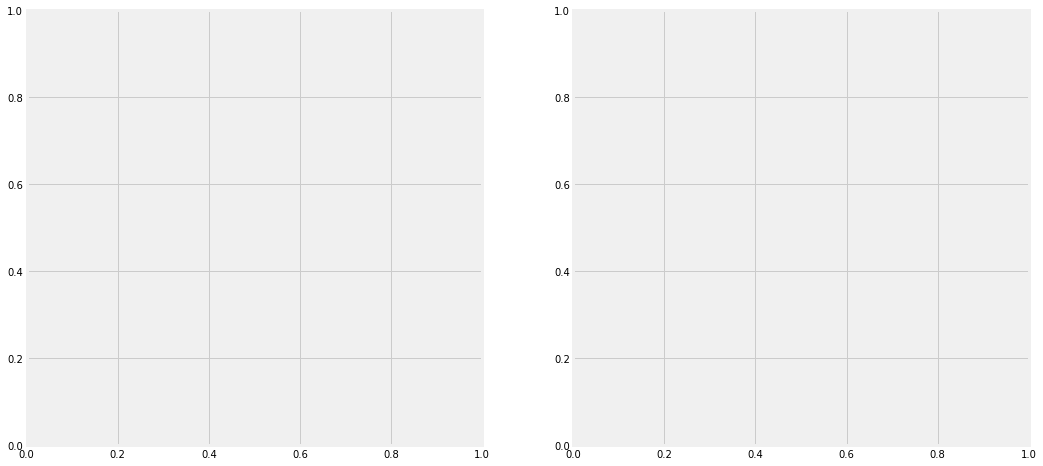

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

df_lr_br = pd.DataFrame(
    {
        'x': x_test_lstat['AGE TAX'].values,
        'y_test': y_test.values,
        'y_test_lr_mean': y_test_lr_mean,
        'y_test_br_mean': y_test_br_mean,
        'y_test_br Lower Bound': (y_test_br_mean - 1.96 * y_test_br_std),
        'y_test_br Upper Bound': (y_test_br_mean + 1.96 * y_test_br_std),
        
    }
).sort_values('x')

df_lr_br.plot(
    kind='scatter',
    label='y_test',
    x='x',
    y='y_test',
    ax=axs[0]
)

df_lr_br.plot(
    kind='scatter',
    label='y_test',
    x='x',
    y='y_test',
    ax=axs[1]
)


df_lr_br.plot(
    title='LinearRegression',
    kind='scatter',
    label='y_test_lr_mean',
    x='x',
    y='y_test_lr_mean',
    color='r',
    ax=axs[0]
)

df_lr_br.plot(
    title='BayesianRidge',
    kind='scatter',
    label='y_test_br_mean',
    x='x',
    y='y_test_br_mean',
    color='r',
    ax=axs[1]
)

df_lr_br.set_index('x')['y_test_br Lower Bound'].plot(
    kind='line',
    linestyle='--',
    label='',
    color='k',
    alpha=0.8,
    ax=axs[1]
)

df_lr_br.set_index('x')['y_test_br Upper Bound'].plot(
    kind='line',
    linestyle='--',
    label='',
    color='k',
    alpha=0.8,
    ax=axs[1]
)

# axs[1].fill_between(
#     df_lr_br['x'], 
#     df_lr_br['y_test_br Lower Bound'], 
#     df_lr_br['y_test_br Upper Bound'],
#     color="pink", alpha=0.5, label="predict std"
# )

axs[0].legend()
axs[1].legend()

fig.show()

In [ ]:
df_taxi

In [ ]:
df_taxi.sample(frac=1)

